# 1. Introduction

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# 2. Dataset features:

1. Id : customer id 
2. Year_Birth : Birth year of customer
3. Education : Highest education of customer
4. Marital_Status : marital status 
5. Income : annual income
6. Kidhome : number of kids at home
7. Teenhome : number of teen at home
8. Dt_Customer : date of customer enrollment in company
9. Recency : Number of days since last purchase
10. MntWines : Amount spend on wines in last 2 years
11. MntFruits : Amount spend on Fruits in last 2 years
12. MntMeatProducts : Amount spend on MeatProducts in last 2 years
13. MntFishProducts : Amount spend on FishProducts in last 2 years
14. MntSweetProducts : Amount spend on SweetProducts in last 2 years
15. MntGoldProds : Amount spend on GoldProds in last 2 years
16. NumDealsPurchases : Number of purcheses made from deals
17. NumDealsPurchases : Number of purcheses made from website
18. NumDealsPurchases : Number of purcheses made from catalog
19. NumDealsPurchases : Number of purcheses made from store
20. NumDealsPurchases : Number of web visit in last month
21. AcceptedCmp1 : 1, if purchase made in campaign 1
22. AcceptedCmp2 : 1, if purchase made in campaign 2
23. AcceptedCmp3 : 1, if purchase made in campaign 3
24. AcceptedCmp4 : 1, if purchase made in campaign 4
25. AcceptedCmp5 : 1, if purchase made in campaign 5
26. Complain : Complain made in last 2 years
27. Z_costcontact : contact cost(constant)
28. Z_Revenue : Revenue (constant)
29. Response : 1 if purchase made in last campaign

# 3. Importing Libraries

In [69]:
import pandas as pd
import numpy as np
from datetime import datetime 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy import stats
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# 4. Importing dataset

In [70]:
df = pd.read_csv("marketing_campaign.csv")
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# 5. Dataset exploration

In [71]:
df.shape

(2240, 29)

In [72]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [73]:
for i in df.columns :
    if df[i].dtype == 'object':
        print(df[i].value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
2012-08-31    12
2012-09-12    11
2013-02-14    11
2014-05-12    11
2013-08-20    10
              ..
2012-08-05     1
2012-11-18     1
2013-05-25     1
2013-04-14     1
2014-01-09     1
Name: Dt_Customer, Length: 663, dtype: int64


In [74]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# 6. Data Preprocessing

# Filling Nulls

In [75]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [76]:
df['Income'] = df['Income'].fillna(df.Income.mean())

In [77]:
df.Income.isna().sum()

0

# Removing Outliers

In [78]:
df['Age'] = 2022 - df['Year_Birth']

<AxesSubplot: xlabel='Age', ylabel='Count'>

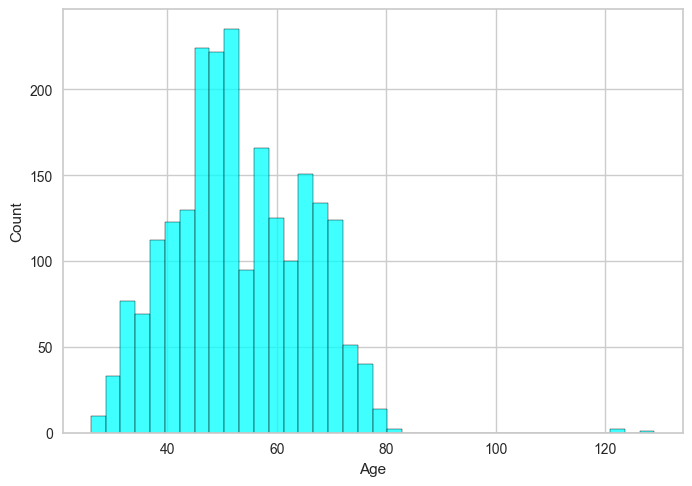

In [79]:
sns.histplot(df.Age, color='#00FFFF')

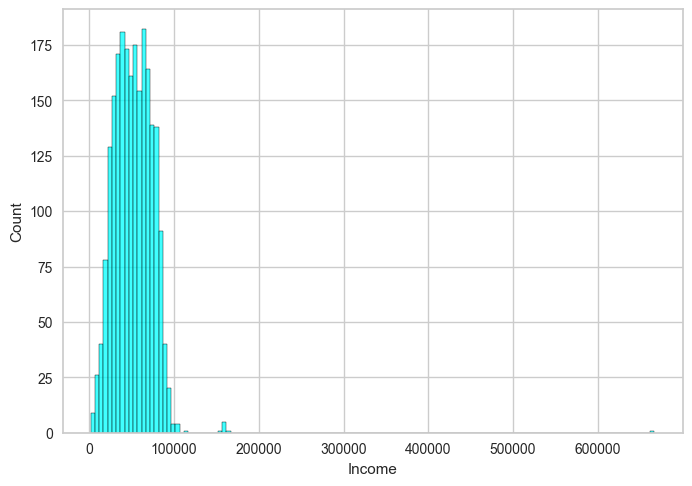

In [80]:
sns.histplot(df.Income, color='#00FFFF');

In [81]:
df = df[(np.abs(stats.zscore(df['Income'])) < 3)]

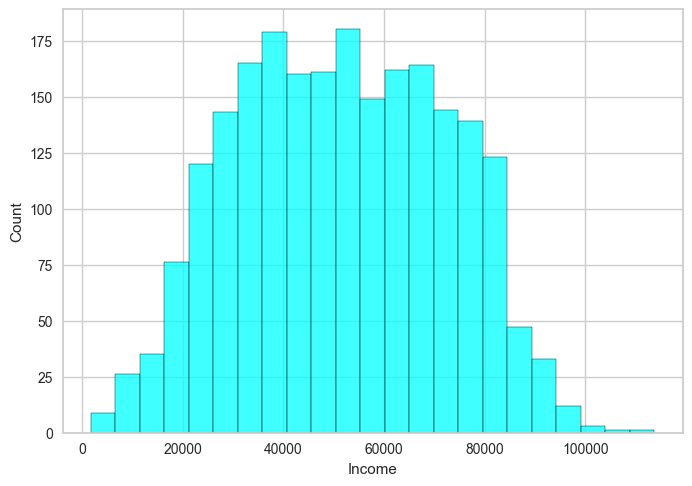

In [82]:
sns.histplot(df.Income, color='#00FFFF');

In [83]:
df = df[(np.abs(stats.zscore(df['Age'])) < 3)]

<AxesSubplot: xlabel='Age', ylabel='Count'>

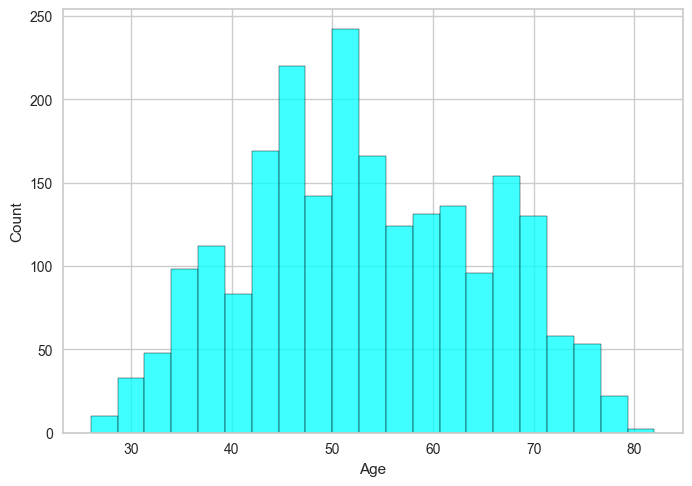

In [84]:
sns.histplot(df.Age, color='#00FFFF')

# 7. Feature Engineering

In [85]:
df["Education"].replace({"Basic":0,"2n Cycle":1, "Graduation":2, "Master":3, "PhD":4},inplace=True)

In [86]:
df['Marital_Status'].replace({'Married':1,'Together':1,'Single':0,'Divorced':0,'Widow':0,'Alone':0,'Absurd':0,'YOLO':0},inplace=True)

In [87]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [88]:
df['TotalMem'] = df['Marital_Status']+df['Children']+1

In [89]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [90]:
print(df['Dt_Customer'].min())
print(df['Dt_Customer'].max())

2012-07-30 00:00:00
2014-06-29 00:00:00


In [91]:
today = datetime.today()
df['Days_as_customer'] = (today-df['Dt_Customer']).dt.days

In [92]:
df['Total_Mnt'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [93]:
df['Wines_Prob'] = df['MntWines']/df['Total_Mnt']
df['Fruits_Prob'] = df['MntFruits']/df['Total_Mnt']
df['Meatprod_Prob'] = df['MntMeatProducts']/df['Total_Mnt']
df['Fish_Prob'] = df['MntFishProducts']/df['Total_Mnt']
df['Sweet_Prob'] = df['MntSweetProducts']/df['Total_Mnt']
df['Gold_Prob'] = df['MntGoldProds']/df['Total_Mnt']

In [94]:
df['TotalPurchase'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] 

In [95]:
df['Offer_Responses'] = df['AcceptedCmp3'] + df['AcceptedCmp2'] + df['AcceptedCmp1'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] 

In [96]:
fields_to_drop=['ID','Year_Birth','Dt_Customer','Z_CostContact','Z_Revenue','AcceptedCmp1','AcceptedCmp2',
                'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','MntFruits','MntWines',
                'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df.drop(fields_to_drop, axis=1 ,inplace=True)

In [97]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Age', 'Children', 'TotalMem', 'Days_as_customer',
       'Total_Mnt', 'Wines_Prob', 'Fruits_Prob', 'Meatprod_Prob', 'Fish_Prob',
       'Sweet_Prob', 'Gold_Prob', 'TotalPurchase', 'Offer_Responses'],
      dtype='object')

# 8. EDA

<AxesSubplot: xlabel='Education', ylabel='count'>

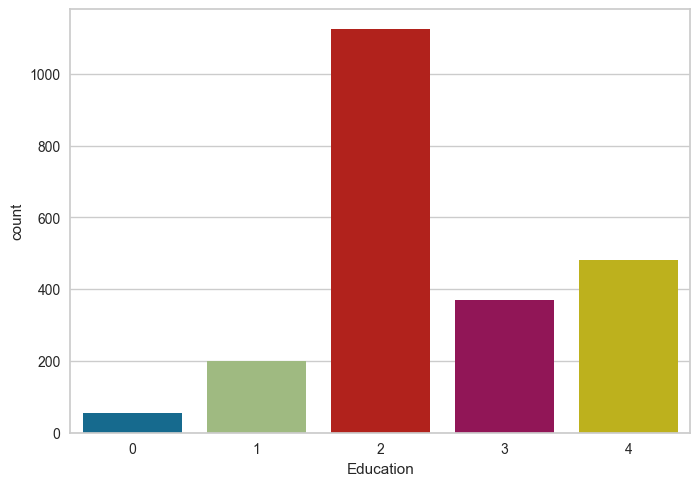

In [98]:
sns.countplot(x="Education",data=df)

<AxesSubplot: xlabel='Age', ylabel='Count'>

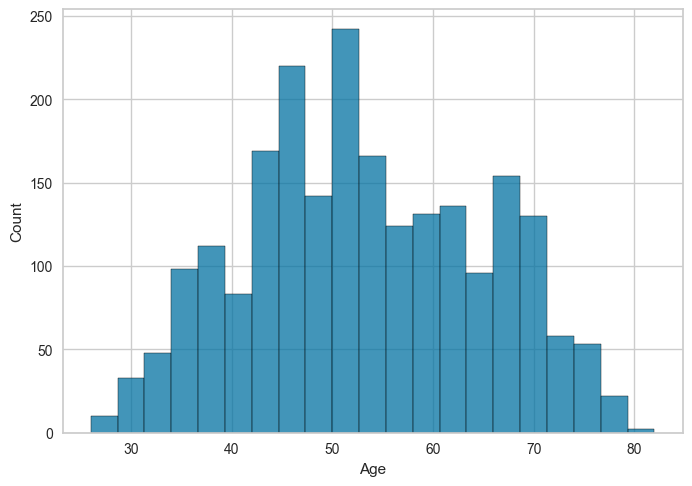

In [99]:
sns.histplot(x="Age",data=df)

<AxesSubplot: xlabel='Education', ylabel='Total_Mnt'>

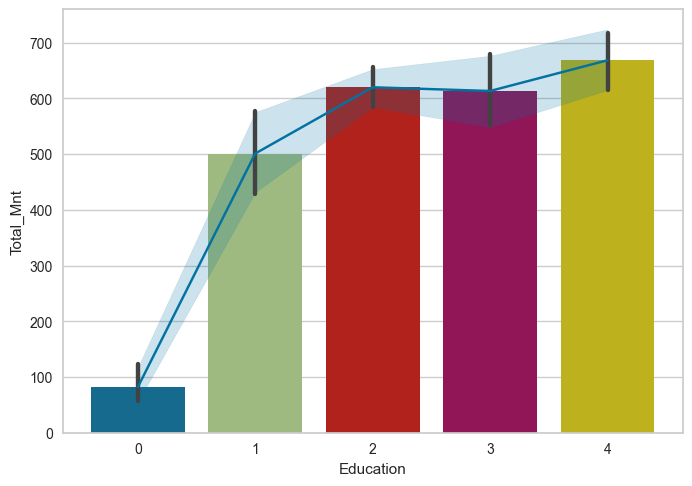

In [100]:
sns.barplot(x="Education",y='Total_Mnt',data=df)
sns.lineplot(x="Education",y='Total_Mnt',data=df)

<AxesSubplot: xlabel='Age', ylabel='Total_Mnt'>

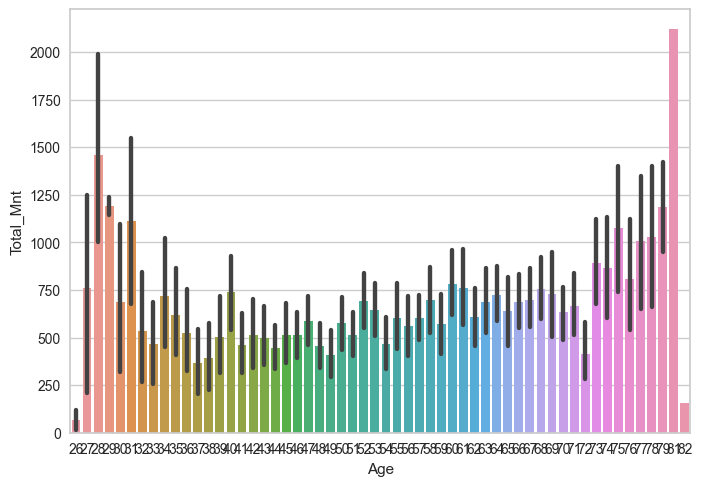

In [101]:
sns.barplot(x="Age",y='Total_Mnt',data=df)

<AxesSubplot: xlabel='TotalMem', ylabel='Total_Mnt'>

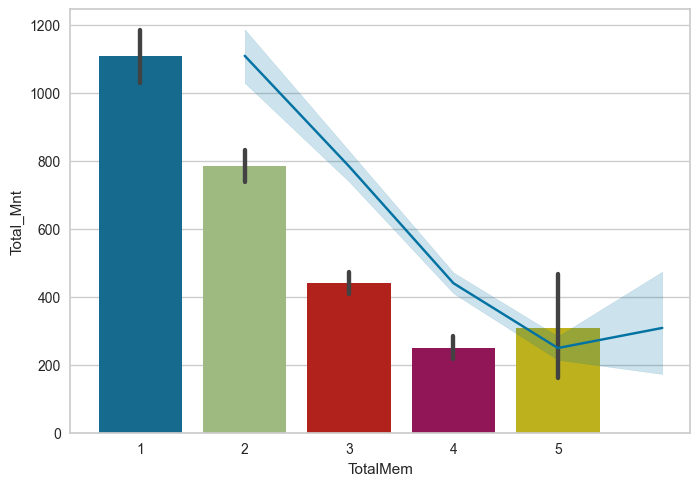

In [102]:
sns.barplot(x="TotalMem",y='Total_Mnt',data=df)
sns.lineplot(x="TotalMem",y='Total_Mnt',data=df)

<AxesSubplot: xlabel='Offer_Responses', ylabel='Total_Mnt'>

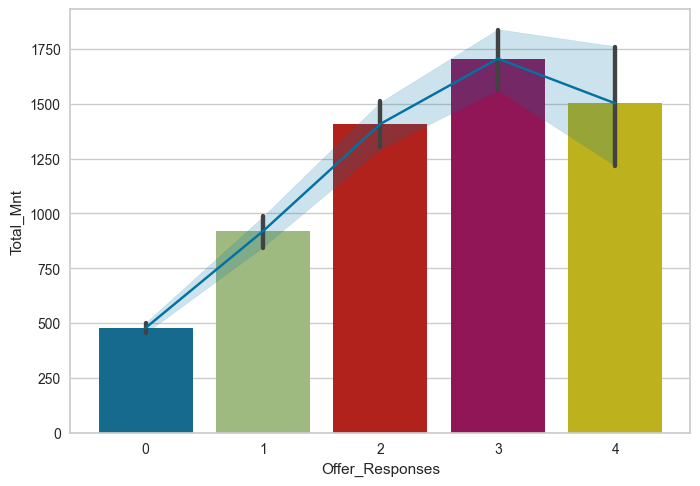

In [103]:
sns.barplot(x="Offer_Responses",y='Total_Mnt',data=df)
sns.lineplot(x="Offer_Responses",y='Total_Mnt',data=df)

<AxesSubplot: xlabel='Days_as_customer', ylabel='Total_Mnt'>

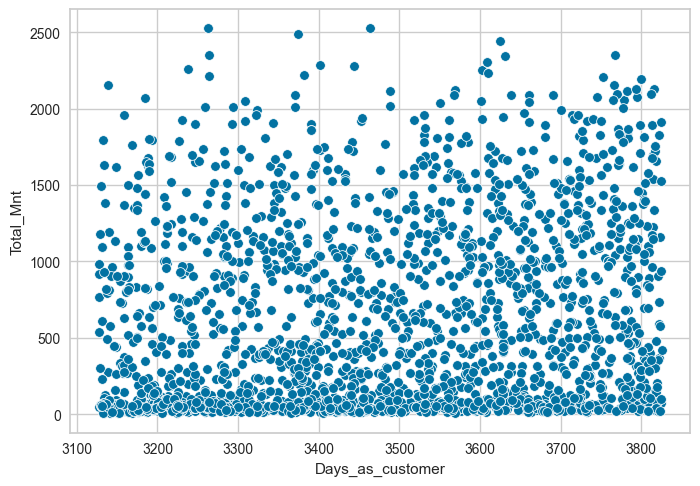

In [104]:
sns.scatterplot(x="Days_as_customer",y='Total_Mnt',data=df)

<AxesSubplot: xlabel='Income', ylabel='Total_Mnt'>

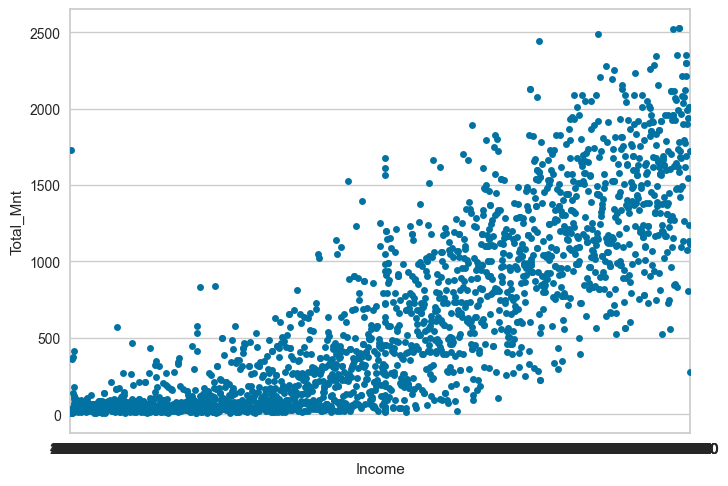

In [105]:
sns.stripplot(x="Income",y='Total_Mnt',data=df)

# 9. Feature Scaling

In [106]:
data = df.copy()

In [107]:
scaler = StandardScaler()
dfs = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [108]:
dfs.head(3)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,...,Days_as_customer,Total_Mnt,Wines_Prob,Fruits_Prob,Meatprod_Prob,Fish_Prob,Sweet_Prob,Gold_Prob,TotalPurchase,Offer_Responses
0,-0.45723,-1.345676,0.316030,-0.825592,-0.931676,0.307314,0.358938,1.405471,2.633984,-0.559160,...,1.529265,1.683247,-0.292520,0.089676,0.717581,0.448772,0.058518,-0.603989,1.329444,-0.439754
1,-0.45723,-1.345676,-0.256586,1.031365,0.904492,-0.383771,-0.168815,-1.117198,-0.585437,-1.176175,...,-1.190769,-0.962795,-0.227998,-0.222256,-0.213373,0.033705,-0.225574,0.936001,-1.163838,-0.439754
2,-0.45723,0.743121,0.970262,-0.825592,-0.931676,-0.798422,-0.696567,1.405471,-0.227723,1.291882,...,-0.206611,0.283674,0.393145,0.246184,-0.685643,0.920075,-0.388582,-0.606724,0.804543,-0.439754


# 10. Dimensionality Reduction

In [109]:
p = PCA(n_components = 3)

In [110]:
p.fit(dfs)

PCA(n_components=3)

In [111]:
W = p.components_.T

In [112]:
W

array([[ 0.08696084,  0.21276692, -0.32640991],
       [-0.02899455,  0.08091874,  0.07741832],
       [ 0.3504243 ,  0.03598285, -0.04348472],
       [-0.28274522,  0.08871015,  0.01692602],
       [-0.0305161 ,  0.38096137,  0.11707301],
       [-0.00063271,  0.00510061,  0.00647699],
       [-0.03581835,  0.26550406,  0.40533397],
       [ 0.24012946,  0.12895528,  0.31685267],
       [ 0.3270069 , -0.05111997,  0.0810893 ],
       [ 0.31118237,  0.04108385,  0.17232981],
       [-0.23457258,  0.1371032 ,  0.19843077],
       [ 0.10451251, -0.04969421,  0.0199377 ],
       [ 0.08835591,  0.18138853, -0.05305818],
       [-0.22463473,  0.33951258,  0.09693219],
       [-0.20145211,  0.32405019,  0.12118001],
       [ 0.03342879,  0.0266943 ,  0.37541797],
       [ 0.35925562, -0.03846683,  0.07508126],
       [ 0.1375854 ,  0.39211263, -0.21062163],
       [-0.07368413, -0.26750841,  0.23004903],
       [ 0.05987615, -0.18507841, -0.11575468],
       [-0.08316768, -0.26964064,  0.203

In [113]:
pd.DataFrame(W, index = dfs.columns, columns = ['W1','W2','W3'])

,W1,W2,W3
Education,0.086961,0.212767,-0.326410
Marital_Status,-0.028995,0.080919,0.077418
Income,0.350424,0.035983,-0.043485
Kidhome,-0.282745,0.088710,0.016926
Teenhome,-0.030516,0.380961,0.117073
Recency,-0.000633,0.005101,0.006477
NumDealsPurchases,-0.035818,0.265504,0.405334
NumWebPurchases,0.240129,0.128955,0.316853
NumCatalogPurchases,0.327007,-0.051120,0.081089
NumStorePurchases,0.311182,0.041084,0.172330


In [114]:
p.explained_variance_

array([6.32378767, 4.05344321, 1.94240787])

In [115]:
p.explained_variance_ratio_

array([0.25283802, 0.16206499, 0.07766146])

In [116]:
pd.DataFrame(p.explained_variance_ratio_, index=range(1,4), columns=['Explained Variability'])

,Explained Variability
1,0.252838
2,0.162065
3,0.077661


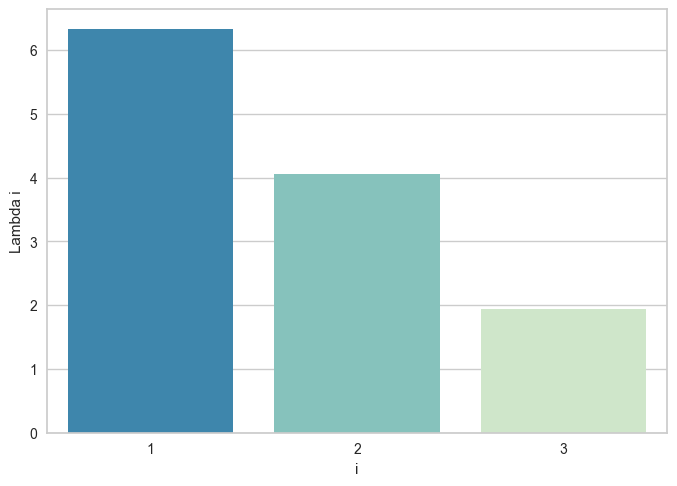

In [117]:
sns.barplot(x = list(range(1,4)), y = p.explained_variance_, palette = 'GnBu_r')
plt.xlabel('i')
plt.ylabel('Lambda i');

In [118]:
data_PCA = pd.DataFrame(p.transform(dfs), columns=(['col1', 'col2', 'col3']))
data_PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2229.0,-4.462808e-17,2.514714,-4.944386,-2.241564,-0.215839,2.157908,6.012151
col2,2229.0,-2.550176e-17,2.013316,-4.704672,-1.618709,-0.038364,1.647724,6.061482
col3,2229.0,6.056668e-17,1.393710,-3.450216,-0.966817,-0.044740,0.885133,6.351718


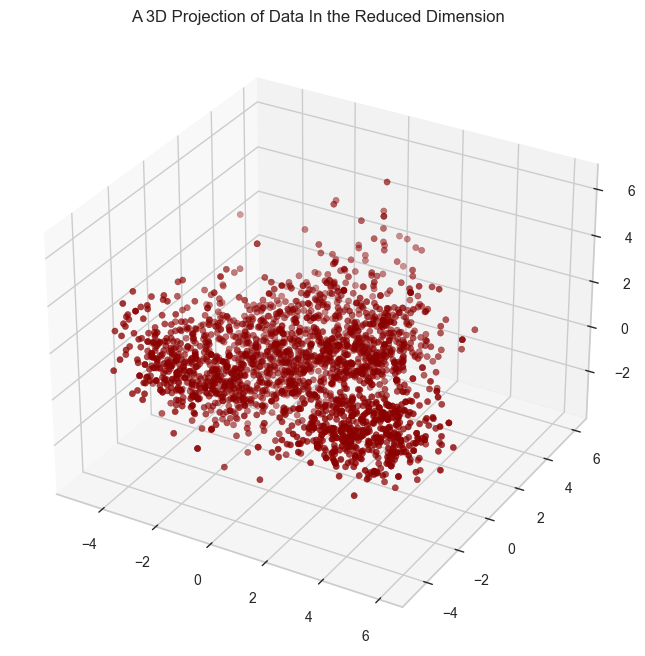

In [119]:
x = data_PCA['col1']
y = data_PCA['col2']
z = data_PCA['col3']

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='darkred', marker='o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension')
plt.show()

# 11. Clustering

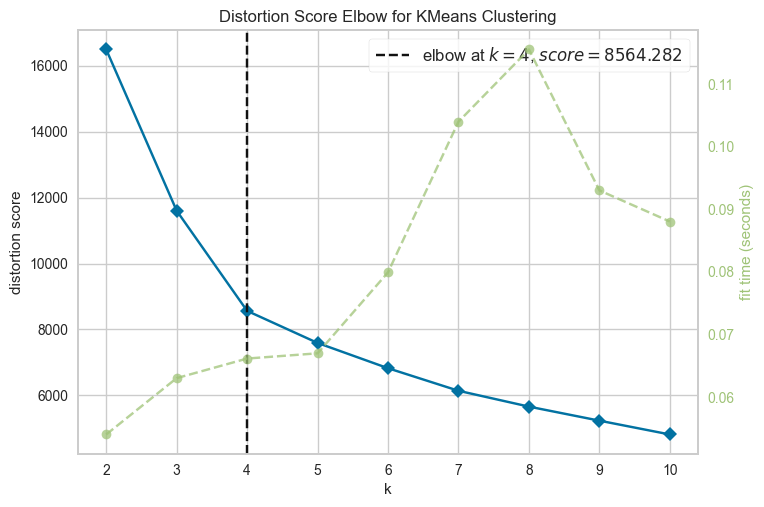

In [120]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_PCA)
Elbow_M.show();

In [121]:
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(data_PCA)
data_PCA['Clusters'] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data['Clusters'] = yhat_AC
dfs['Clusters'] = yhat_AC

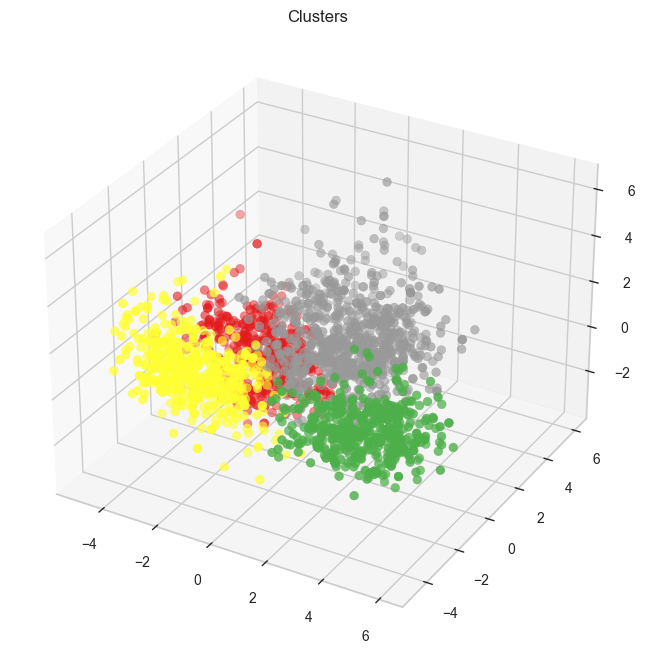

In [122]:
fig = plt.figure(figsize=(13,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=data_PCA['Clusters'], marker='o', cmap='Set1_r',)
ax.set_title('Clusters')
plt.show()

# 12. Clusters Analysis and Customers Profiling

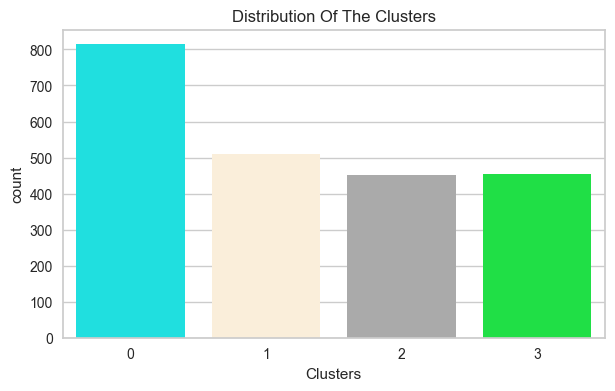

In [123]:
pal = ['#00FFFF','#FFEFD5', '#AAA','#00FF33']
plt.figure(figsize=(7,4))
pl = sns.countplot(x=data['Clusters'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

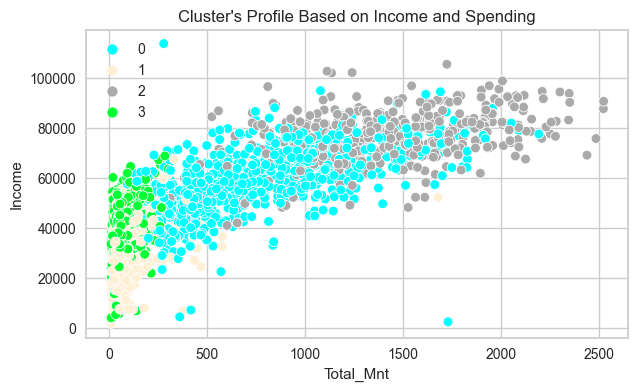

In [124]:
plt.figure(figsize=(7,4))
pl = sns.scatterplot(data=data, x=data['Total_Mnt'], y=data['Income'], hue=data['Clusters'], palette= pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend();

Majorly , Customer of cluster 0 and 2 age earing a high income, and spending a higher amount comparatively

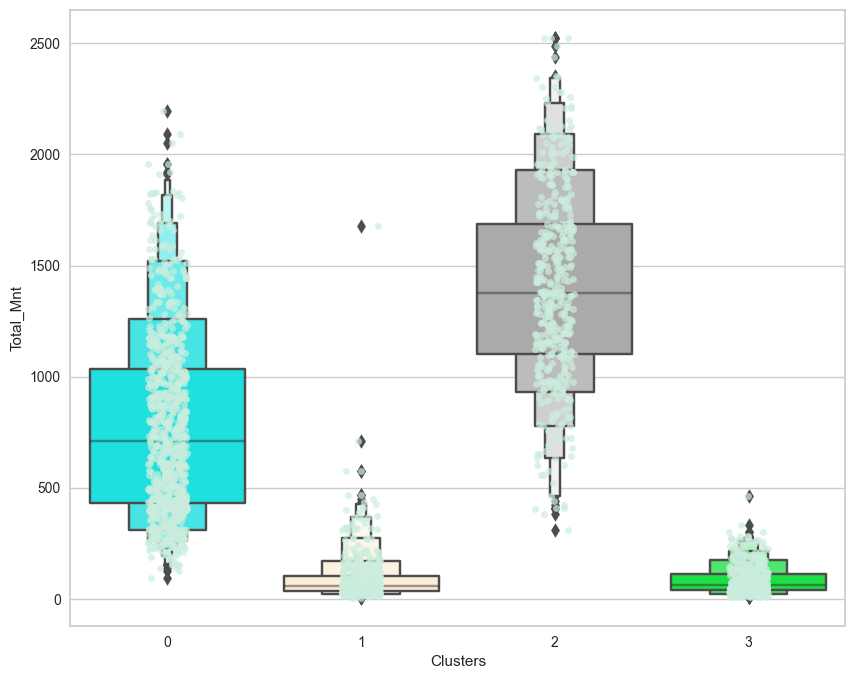

In [125]:
plt.figure(figsize=(10,8))
pl = sns.stripplot(x=data['Clusters'], y=data['Total_Mnt'], color="#CBEDDD", alpha=0.7)
pl = sns.boxenplot(x=data['Clusters'], y=data['Total_Mnt'], palette=pal)
plt.show();

If custumer belong from cluster 0 and 2 , he/she is most likely to spend more on products

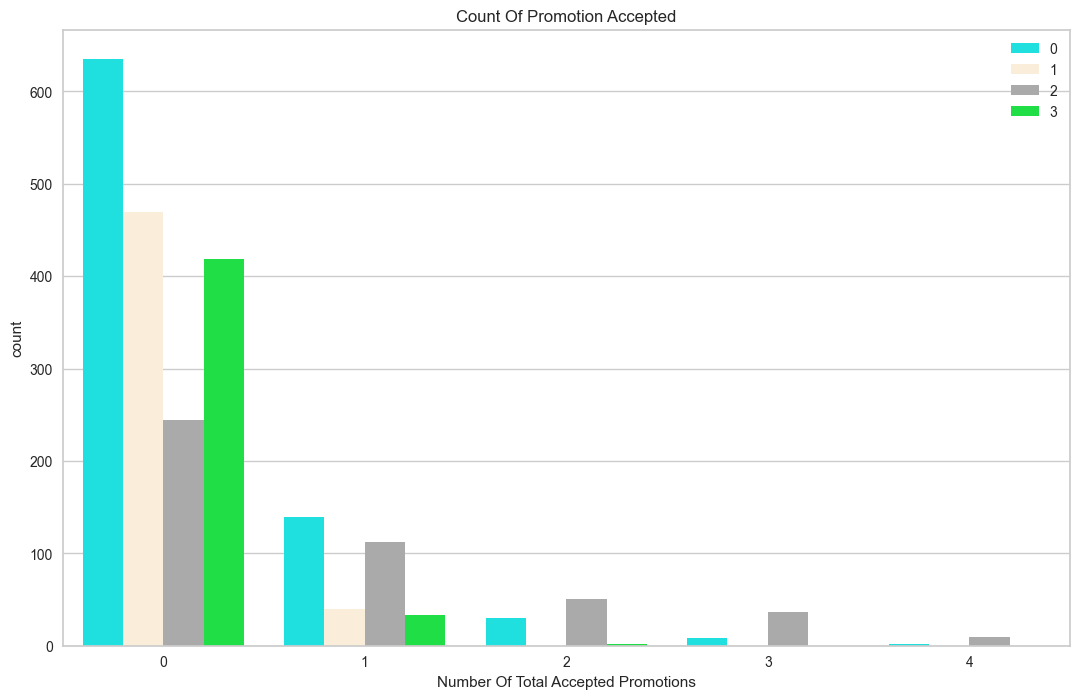

In [126]:
plt.figure(figsize=(13,8))
pl = sns.countplot(x=data['Offer_Responses'], hue=data['Clusters'], palette= pal)
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
plt.show();

Customer from cluster 0 and 2 are more likely to accept the offer compared to others

# Customer profiling

In [130]:
Personal= ['Education', 'Marital_Status','Kidhome', 'Teenhome',
       'Recency','Response', 'Age', 'Children','TotalMem']

<Figure size 800x550 with 0 Axes>

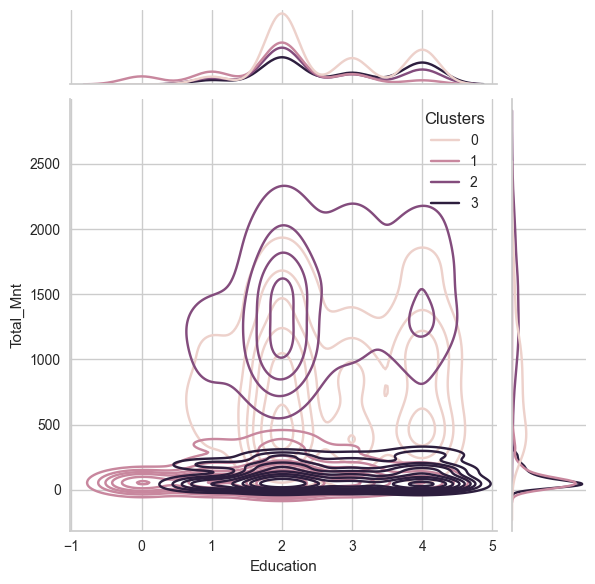

<Figure size 800x550 with 0 Axes>

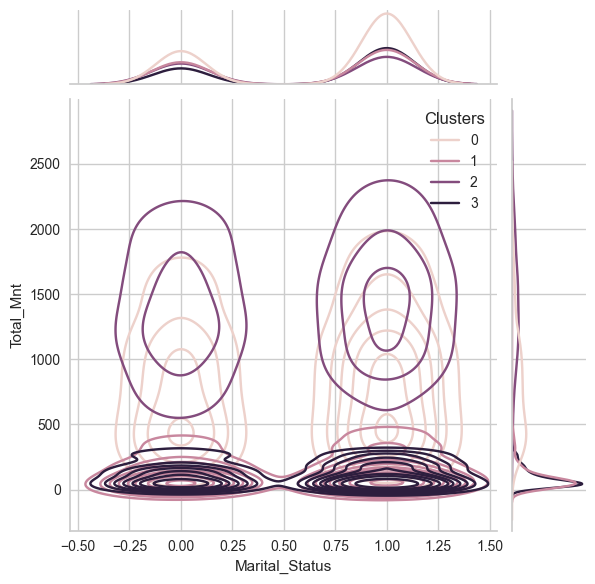

<Figure size 800x550 with 0 Axes>

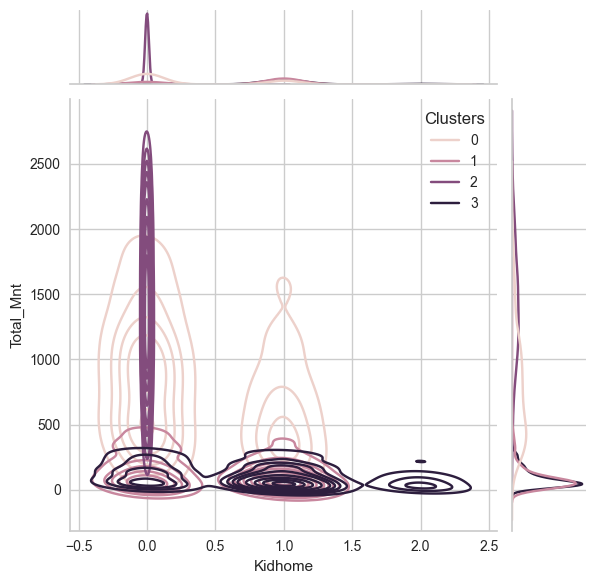

<Figure size 800x550 with 0 Axes>

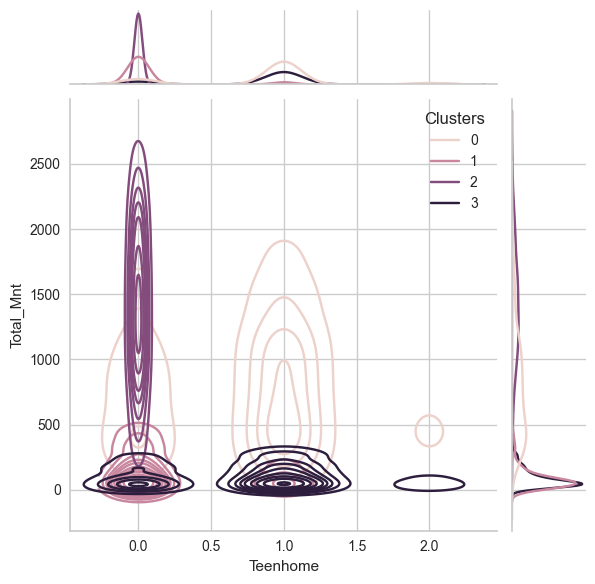

<Figure size 800x550 with 0 Axes>

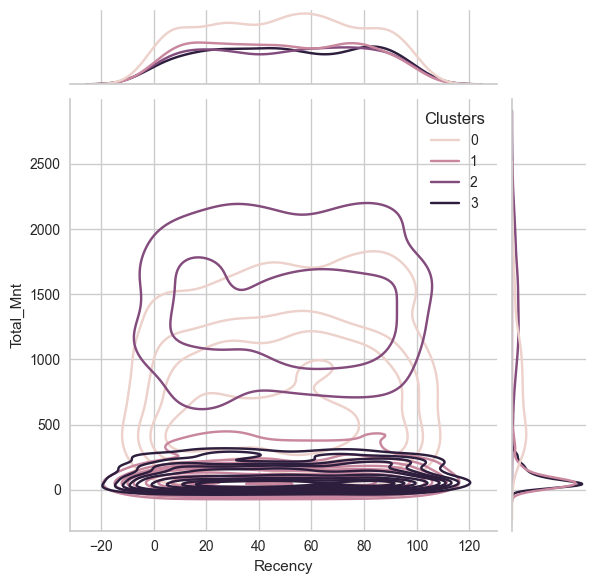

<Figure size 800x550 with 0 Axes>

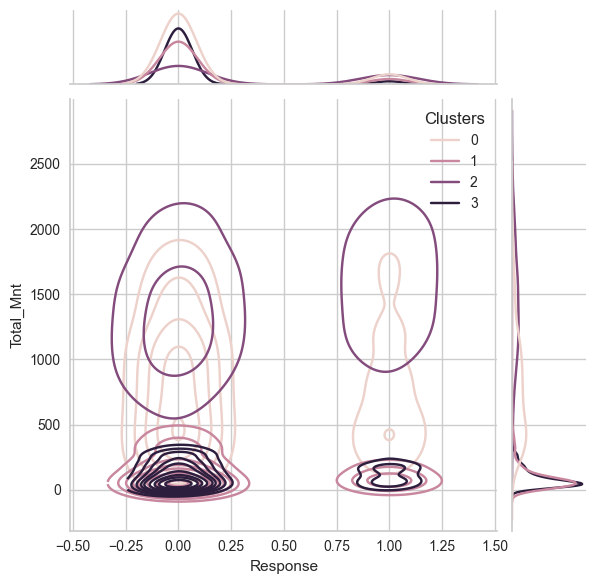

<Figure size 800x550 with 0 Axes>

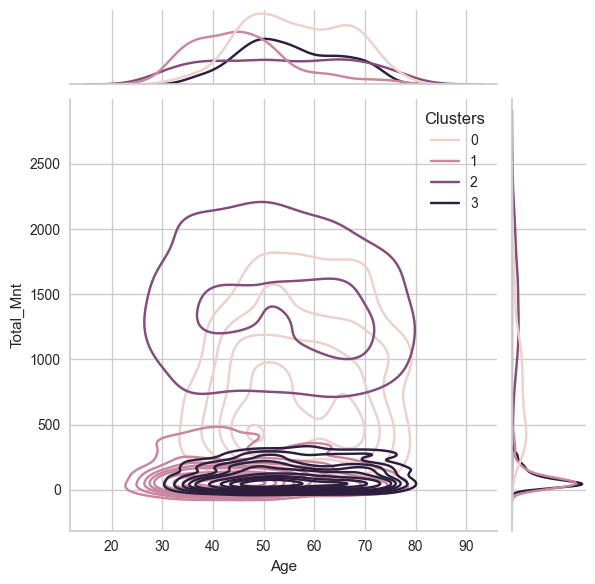

<Figure size 800x550 with 0 Axes>

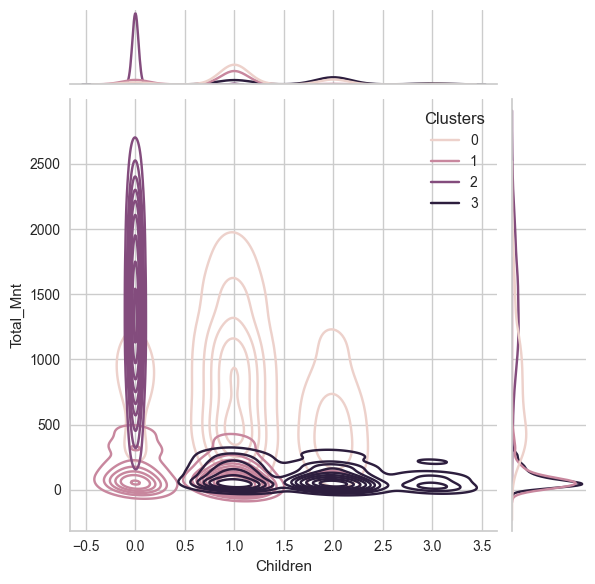

<Figure size 800x550 with 0 Axes>

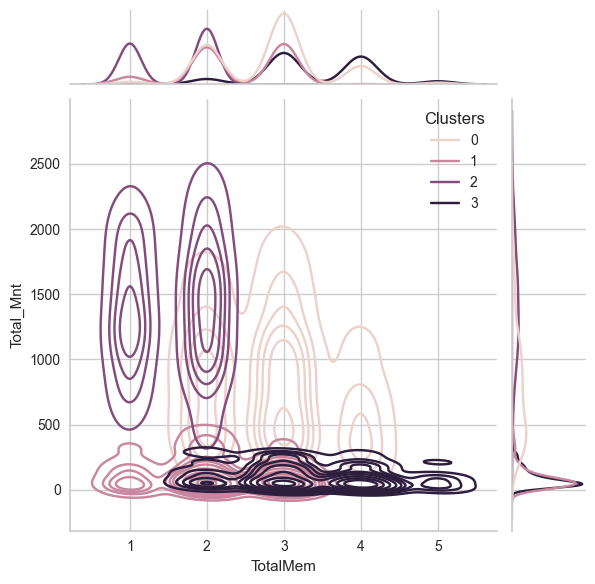

In [131]:
for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i],y=data["Total_Mnt"],hue=data["Clusters"],kind="kde")
    plt.show()

About Cluster 0:
1. They have atleast 2N cycle as education and Upto PHD
2. They are relatively older in age
3. Most likely to have a single child
4. Have 2-3 family members

About Cluster 1:
1. They majorly have basic education
2. They are relatively younger in age
3. Most likely they are not a parent or having max 1 child
4. Have 1-3 Total family members

About Cluster 2:
1. They have atleast 2N cycle as education and Upto PHD
2. From all age group
3. Definately not a parent
4. Have 1-2 Total family members

About Cluster 3:
1. They have atleast 2N cycle as education and Upto PHD
2. They are relatively older in age
3. Definately a parent
4. Have 2-5 Total family members